Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.2829 - loss: 1.9354 - val_accuracy: 0.5009 - val_loss: 1.3947
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - accuracy: 0.4745 - loss: 1.4602 - val_accuracy: 0.5722 - val_loss: 1.2191
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.5250 - loss: 1.3333 - val_accuracy: 0.5661 - val_loss: 1.1924
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.5606 - loss: 1.2481 - val_accuracy: 0.6007 - val_loss: 1.1265
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.5732 - loss: 1.2059 - val_accuracy: 0.6337 - val_loss: 1.0597
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5909 - loss: 1.1600 - val_accuracy: 0.6281 - val_loss: 1.0527
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6035 - loss: 1.1286 - val_accuracy: 0.6514 - val_loss: 0.9997
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6161 -

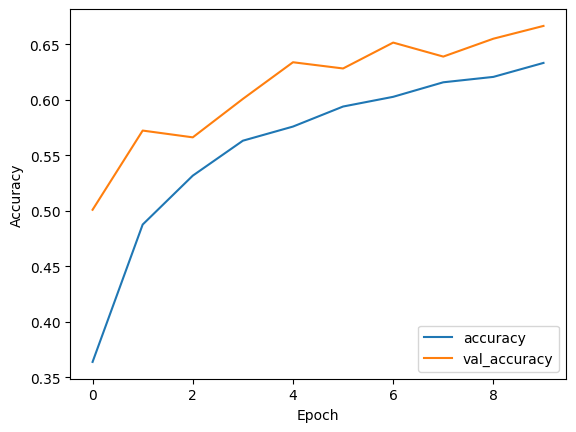

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values

# Define the lightweight CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save("lightweight_cnn_model.h5")


In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50

# Load VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top
vgg_top_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile and evaluate the VGG16-based model on CIFAR-10
vgg_top_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
vgg_top_model.fit(train_images, train_labels, epochs=10,
                  validation_data=(test_images, test_labels))

# Similarly, load and evaluate ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_model.trainable = False


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 855s 546ms/step - accuracy: 0.4425 - loss: 1.5901 - val_accuracy: 0.5514 - val_loss: 1.2786
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 751s 481ms/step - accuracy: 0.5741 - loss: 1.2231 - val_accuracy: 0.5679 - val_loss: 1.2259
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 771s 493ms/step - accuracy: 0.5945 - loss: 1.1694 - val_accuracy: 0.5819 - val_loss: 1.1900
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 803s 494ms/step - accuracy: 0.6054 - loss: 1.1346 - val_accuracy: 0.5792 - val_loss: 1.1878
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 801s 494ms/step - accuracy: 0.6084 - loss: 1.1165 - val_accuracy: 0.5914 - val_loss: 1.1818
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 803s 494ms/step - accuracy: 0.6176 - loss: 1.0863 - val_accuracy: 0.5973 - val_loss: 1.1596
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 752s 481ms/step - accuracy: 0.6259 - loss: 1.0745 - val_accuracy: 0.5981 - val_loss: 1.1618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 821s 493ms/step - ac

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 - 53s - 34ms/step - accuracy: 0.3519 - loss: 1.7504 - val_accuracy: 0.5086 - val_loss: 1.3758
Epoch 2/10
1563/1563 - 81s - 52ms/step - accuracy: 0.4693 - loss: 1.4644 - val_accuracy: 0.5587 - val_loss: 1.2733
Epoch 3/10
1563/1563 - 50s - 32ms/step - accuracy: 0.5170 - loss: 1.3487 - val_accuracy: 0.5486 - val_loss: 1.2916
Epoch 4/10
1563/1563 - 94s - 60ms/step - accuracy: 0.5448 - loss: 1.2762 - val_accuracy: 0.5560 - val_loss: 1.2727
Epoch 5/10
1563/1563 - 82s - 53ms/step - accuracy: 0.5606 - loss: 1.2291 - val_accuracy: 0.6231 - val_loss: 1.0766
Epoch 6/10
1563/1563 - 74s - 47ms/step - accuracy: 0.5763 - loss: 1.1967 - val_accuracy: 0.6270 - val_loss: 1.0876
Epoch 7/10
1563/1563 - 79s - 50ms/step - accuracy: 0.5870 - loss: 1.1569 - val_accuracy: 0.6473 - val_loss: 1.0234
Epoch 8/10
1563/1563 - 81s - 52ms/step - accuracy: 0.5966 - loss: 1.1354 - val_accuracy: 0.6536 - val_loss: 0.9982
Epoch 9/10
1563/1563 - 81s - 52ms/step - accuracy: 0.6083 - loss: 1.1097 - val_a

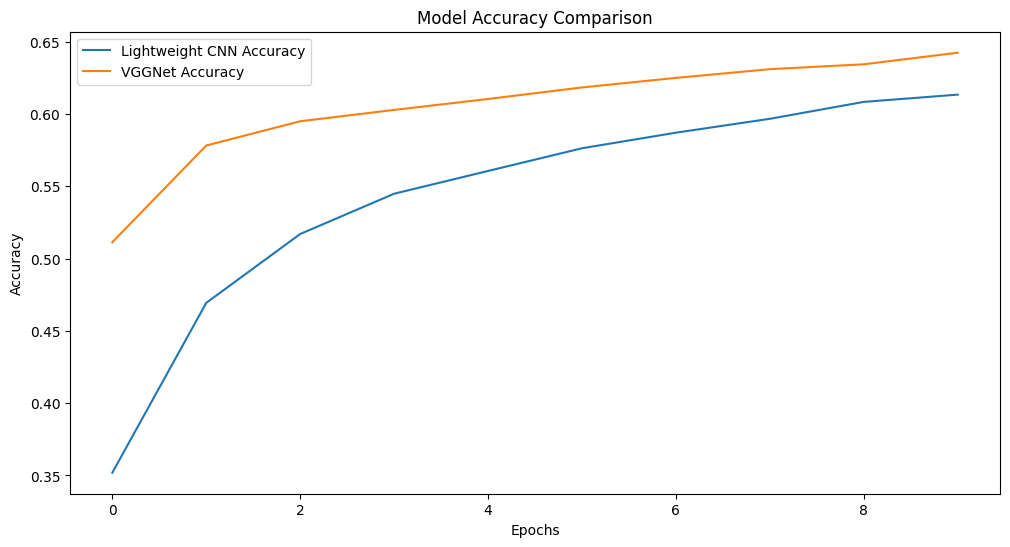

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values

# Define the lightweight CNN model
lightweight_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the lightweight model
lightweight_model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Train the lightweight model
history = lightweight_model.fit(train_images, train_labels, epochs=10,
                                 validation_data=(test_images, test_labels), verbose=2)

# Define and train VGGNet model
vgg_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
vgg_model.trainable = False  # Freeze the pre-trained layers

# Add custom layers on top
vgg_top_model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the VGG model
vgg_top_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the VGG model
vgg_history = vgg_top_model.fit(train_images, train_labels, epochs=10,
                                 validation_data=(test_images, test_labels), verbose=2)

# Plotting the performance of different models
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Lightweight CNN Accuracy')
plt.plot(vgg_history.history['accuracy'], label='VGGNet Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
